# Classification Extended <img align="right" src="../../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">
## Description

Following the model train in the `3_Train_fit_evaluate_classifier.ipynb`, this notebook will extend to explore more machine learning methods on the existing features. 
1. PCA components
2. more machine learning models
3. SVM and XGBoost
4. SHAP to explore the feature importances

# Load Packages

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
labels_dict = {'Crop': 1, 'None-Crop': 0}

In [3]:
df = pd.read_csv('~/wa/crop-mask/eastern_cropmask/results/training_data/gm_mads_two_seasons_training_data_20201217.txt', sep=' ')
df.shape

(3905, 34)

In [4]:
df.head()

,Class,red_S1,blue_S1,green_S1,nir_S1,swir_1_S1,swir_2_S1,red_edge_1_S1,red_edge_2_S1,red_edge_3_S1,...,red_edge_2_S2,red_edge_3_S2,edev_S2,sdev_S2,bcdev_S2,NDVI_S2,LAI_S2,MNDWI_S2,rain_S2,slope
0,1.0,0.127868,0.077203,0.111521,0.301339,0.359995,0.281281,0.185274,0.261258,0.291511,...,0.257073,0.283351,2.246781,7.064623,2.952092,0.224958,0.474304,-0.536428,349.551086,3.004626
1,1.0,0.085796,0.061010,0.083576,0.201338,0.263326,0.182804,0.129189,0.181609,0.203615,...,0.136283,0.151102,3.189153,6.454077,3.263663,0.193874,0.233971,-0.550557,324.611938,3.004626
2,1.0,0.092796,0.055081,0.083433,0.249427,0.301828,0.225577,0.137628,0.219576,0.250052,...,0.205870,0.229395,2.494673,7.128056,3.041181,0.181854,0.306314,-0.584877,324.542236,2.946278
3,1.0,0.064913,0.049440,0.061939,0.155016,0.221684,0.153777,0.088279,0.136593,0.153667,...,0.096557,0.106952,3.291765,6.074180,2.997704,0.170631,0.131878,-0.592229,324.565796,3.173239
4,1.0,0.106678,0.075458,0.100924,0.255760,0.366371,0.262353,0.155476,0.228302,0.258616,...,0.226455,0.254675,2.864643,6.792746,3.433620,0.331307,0.710990,-0.590333,420.008026,1.127961


In [5]:
df.columns

Index(['Class', 'red_S1', 'blue_S1', 'green_S1', 'nir_S1', 'swir_1_S1',
       'swir_2_S1', 'red_edge_1_S1', 'red_edge_2_S1', 'red_edge_3_S1',
       'edev_S1', 'sdev_S1', 'bcdev_S1', 'NDVI_S1', 'LAI_S1', 'MNDWI_S1',
       'rain_S1', 'red_S2', 'blue_S2', 'green_S2', 'nir_S2', 'swir_1_S2',
       'swir_2_S2', 'red_edge_1_S2', 'red_edge_2_S2', 'red_edge_3_S2',
       'edev_S2', 'sdev_S2', 'bcdev_S2', 'NDVI_S2', 'LAI_S2', 'MNDWI_S2',
       'rain_S2', 'slope'],
      dtype='object')

In [6]:
X = df.drop(['Class'], axis=1).values
y = df['Class'].ravel()

In [7]:
X.shape, y.shape

((3905, 33), (3905,))

# Visualization

>Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:

   $$ z = (x - u) / s $$

In [8]:
# Standartize the dataset
scale = StandardScaler()
x_scaled = scale.fit_transform(X)

# verify joblib to dump and load scale model
refere: https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli

In [9]:
import joblib
joblib.dump(scale, 'scale.model')

['scale.model']

In [10]:
scale2 = joblib.load('scale.model')

In [11]:
x_scaled2 = scale2.fit_transform(X)

In [12]:
np.equal(x_scaled, x_scaled2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [16]:
# Use PCA only for visualization
pca = PCA(n_components=2, whiten=True)
x_pca = pca.fit_transform(x_scaled)

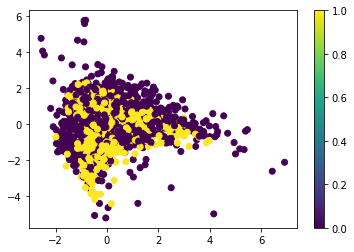

In [17]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.colorbar()
plt.show()

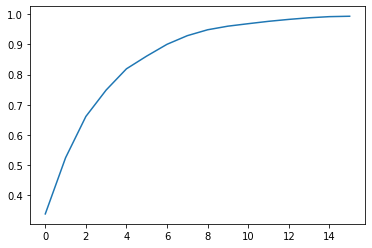

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [18]:
# Use LDA only for visualization
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y)

In [16]:
x_lda

array([[-0.20221247],
       [-1.33247945],
       [ 0.61702754],
       ...,
       [ 1.25396585],
       [ 0.145653  ],
       [ 2.34520777]])

In [17]:
x_lda.shape

(3905, 1)

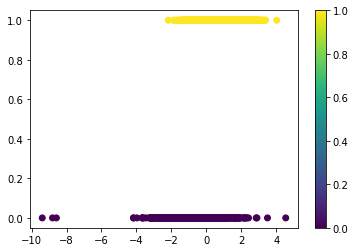

In [19]:
# plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
plt.scatter(x_lda, y, c=y)
plt.colorbar()
plt.show()

In [19]:
# Using tsne
tsne = TSNE(n_components=2, verbose=1, learning_rate=250)
x_tsne = tsne.fit_transform(x_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3905 samples in 0.012s...
[t-SNE] Computed neighbors for 3905 samples in 1.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3905
[t-SNE] Computed conditional probabilities for sample 2000 / 3905
[t-SNE] Computed conditional probabilities for sample 3000 / 3905
[t-SNE] Computed conditional probabilities for sample 3905 / 3905
[t-SNE] Mean sigma: 1.244293
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.550125
[t-SNE] KL divergence after 1000 iterations: 1.455347


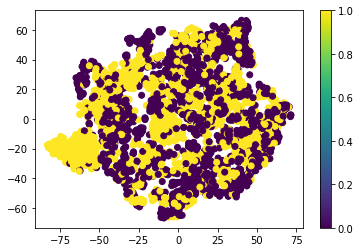

In [20]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
plt.colorbar()
plt.show()

# Classification

In [21]:
# Helper to plot confusion matrix -- from Scikit-learn website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# K-Fold cross-validation with classic mahcine learning classifiers
- The cllasifiers: Decision Tree, Logistic Regression, Random Forest, SVM
- The above Linear Discriminant Analysis indicate that manual features for the first 1 min mp3 can be linearly classified. So, the accuracies are very high with the listed classifiers.

In [22]:
# K-Fold helper
def kfold_validate(clf, X, y, k_folds = 5, zscale=True):
    # Constants
    acc, count, cm = [], 0, 0
    kf = StratifiedKFold(n_splits=k_folds, shuffle = True, random_state=4321)
    if zscale:
        # Normalize the data
        scale = StandardScaler()
        scale.fit(X)
        X = scale.transform(X)
    # K-fold split
    for train_idx, test_idx in kf.split(X, y):
        # Count each fold are we validating
        count += 1
        
        # Separe training and test in the Training set for k-Fold
        fold_Xtrain, fold_Xtest = X[train_idx], X[test_idx]
        fold_ytrain, fold_ytest = y[train_idx], y[test_idx]
#          # Normalize the data
#         scale = StandardScaler()
#         scale.fit(fold_Xtrain)
#         fold_Xtrain = scale.transform(fold_Xtrain)
#         fold_Xtest = scale.transform(fold_Xtest)

        # Train
        clf = sklearn.base.clone(clf)
        clf.fit(fold_Xtrain, fold_ytrain)
        pred = clf.predict(fold_Xtest)
        accuracy = accuracy_score(fold_ytest, pred)
        cm += confusion_matrix(fold_ytest, pred)
        acc.append(accuracy)
        print("Fold: %s of % s => accuracy_score = %s" %(count, k_folds, accuracy))
    
    print("\n::Accuracy_score statistics::")
    print("Mean = {0:.5f}".format(np.mean(acc)))
    print("STD = {0:.5f}".format(np.std(acc)))
    return cm

In [26]:
labels_dict = {0: 'Non-crop', 1: 'Crop'}

Fold: 1 of 5 => accuracy_score = 0.7810499359795134
Fold: 2 of 5 => accuracy_score = 0.7490396927016645
Fold: 3 of 5 => accuracy_score = 0.7669654289372599
Fold: 4 of 5 => accuracy_score = 0.7887323943661971
Fold: 5 of 5 => accuracy_score = 0.7989756722151088

::Accuracy_score statistics::
Mean = 0.77695
STD = 0.01743


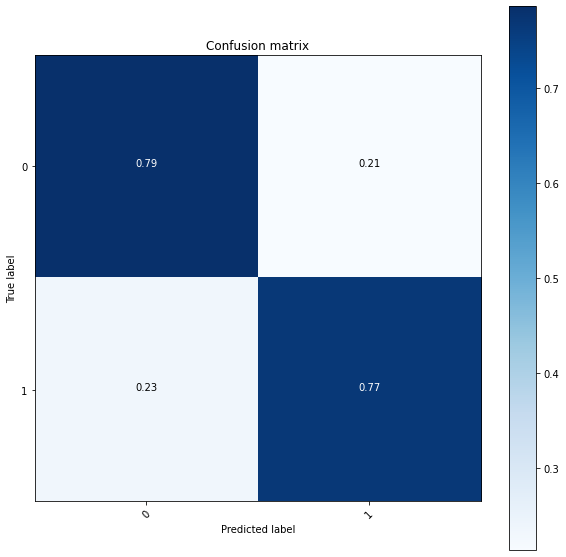

In [27]:
# Decision Tree
cart = DecisionTreeClassifier(criterion = 'entropy')
cm = kfold_validate(cart, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

In [28]:
cart.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [29]:
sorted(zip(cart.feature_importances_, df.columns[1:]), reverse=True)

[(0.1320971606522735, 'rain_S1'),
 (0.12533834041339817, 'rain_S2'),
 (0.05031978348664487, 'MNDWI_S2'),
 (0.04468231362049728, 'slope'),
 (0.04437640790957259, 'LAI_S1'),
 (0.04150251511241489, 'sdev_S1'),
 (0.04097197605186385, 'blue_S2'),
 (0.03586314588814683, 'red_S2'),
 (0.034144675252832574, 'red_edge_3_S1'),
 (0.034061042413470334, 'bcdev_S1'),
 (0.030050180466244313, 'NDVI_S2'),
 (0.02938188751029404, 'swir_2_S2'),
 (0.029008015228273613, 'MNDWI_S1'),
 (0.02659947802745074, 'nir_S1'),
 (0.02566256218764584, 'sdev_S2'),
 (0.02392315094294061, 'swir_1_S2'),
 (0.023539584172089952, 'red_edge_1_S2'),
 (0.02151860930427746, 'NDVI_S1'),
 (0.0214368696680577, 'bcdev_S2'),
 (0.01975405244388079, 'blue_S1'),
 (0.019246276370449105, 'LAI_S2'),
 (0.01922523575862998, 'red_edge_1_S1'),
 (0.01895891968343246, 'red_S1'),
 (0.017191264930873404, 'swir_1_S1'),
 (0.017146418777453373, 'swir_2_S1'),
 (0.017065703201913494, 'red_edge_3_S2'),
 (0.012276040210111073, 'edev_S1'),
 (0.01189724190366

/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

Fold: 1 of 5 => accuracy_score = 0.7759282970550576
Fold: 2 of 5 => accuracy_score = 0.7836107554417413
Fold: 3 of 5 => accuracy_score = 0.7759282970550576
Fold: 4 of 5 => accuracy_score = 0.7874519846350833


/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

Fold: 5 of 5 => accuracy_score = 0.8104993597951344

::Accuracy_score statistics::
Mean = 0.78668
STD = 0.01272


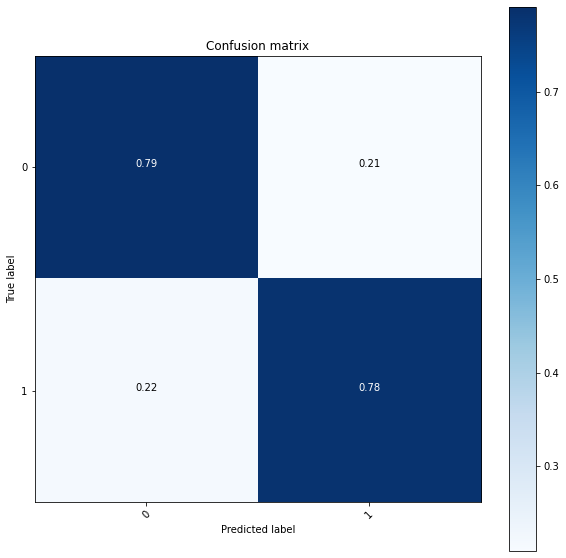

In [30]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', C = 1)
cm = kfold_validate(lr, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.8348271446862996
Fold: 2 of 5 => accuracy_score = 0.8565941101152369
Fold: 3 of 5 => accuracy_score = 0.8322663252240717
Fold: 4 of 5 => accuracy_score = 0.8770806658130602
Fold: 5 of 5 => accuracy_score = 0.8668373879641486

::Accuracy_score statistics::
Mean = 0.85352
STD = 0.01757


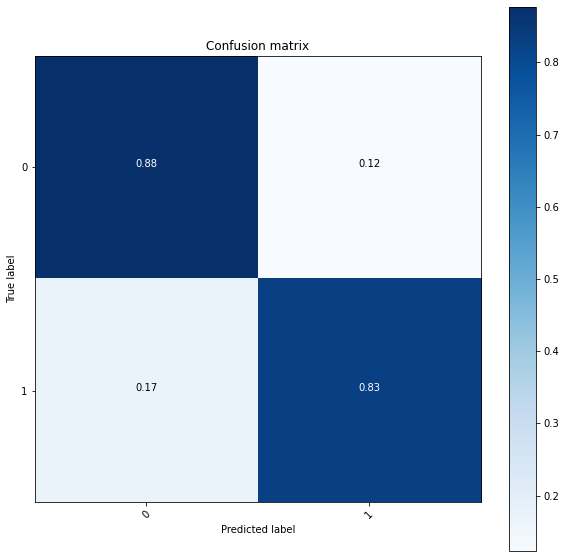

In [31]:
# Random Forests
rf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth = 15)
cm = kfold_validate(rf, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

In [32]:
rf.fit(X, y)
sorted(zip(rf.feature_importances_, df.columns[1:]), reverse=True)

[(0.08598892815104173, 'rain_S2'),
 (0.08014522717442124, 'rain_S1'),
 (0.03844516049518119, 'swir_2_S1'),
 (0.03470351229364192, 'sdev_S2'),
 (0.034476667633317665, 'sdev_S1'),
 (0.0342017468699223, 'blue_S2'),
 (0.03354079655495044, 'slope'),
 (0.032908564226150946, 'LAI_S1'),
 (0.03283979097489556, 'swir_2_S2'),
 (0.03141084863641788, 'NDVI_S1'),
 (0.0290439661162815, 'red_S1'),
 (0.02841316445067325, 'red_edge_1_S1'),
 (0.028155905415762614, 'NDVI_S2'),
 (0.02754623609156253, 'MNDWI_S1'),
 (0.02722431443801007, 'blue_S1'),
 (0.026719288069782885, 'edev_S1'),
 (0.02627338851824489, 'red_edge_1_S2'),
 (0.02595123876610726, 'LAI_S2'),
 (0.025825347047984323, 'MNDWI_S2'),
 (0.024785330581068417, 'swir_1_S1'),
 (0.024619020124211424, 'red_S2'),
 (0.023947693113702526, 'swir_1_S2'),
 (0.023367785474158017, 'bcdev_S1'),
 (0.023349073202324808, 'red_edge_2_S1'),
 (0.02321618829319209, 'edev_S2'),
 (0.023156195256990666, 'nir_S1'),
 (0.022667855729397085, 'red_edge_3_S1'),
 (0.0224328160452

In [33]:
cum_sum = 0
for i, (v, n) in enumerate(sorted(zip(rf.feature_importances_, df.columns[1:]), reverse=True)):
    cum_sum += v
    if cum_sum > 0.9:
        print(i)
        break

28


Fold: 1 of 5 => accuracy_score = 0.8578745198463509
Fold: 2 of 5 => accuracy_score = 0.8706786171574904
Fold: 3 of 5 => accuracy_score = 0.8348271446862996
Fold: 4 of 5 => accuracy_score = 0.8758002560819462
Fold: 5 of 5 => accuracy_score = 0.8706786171574904

::Accuracy_score statistics::
Mean = 0.86197
STD = 0.01481


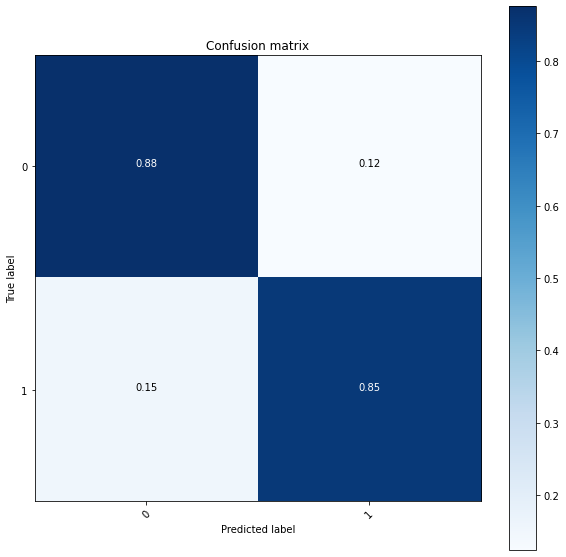

In [34]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='rbf')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.7746478873239436
Fold: 2 of 5 => accuracy_score = 0.7759282970550576
Fold: 3 of 5 => accuracy_score = 0.7887323943661971
Fold: 4 of 5 => accuracy_score = 0.7912932138284251
Fold: 5 of 5 => accuracy_score = 0.8156209987195903

::Accuracy_score statistics::
Mean = 0.78924
STD = 0.01477


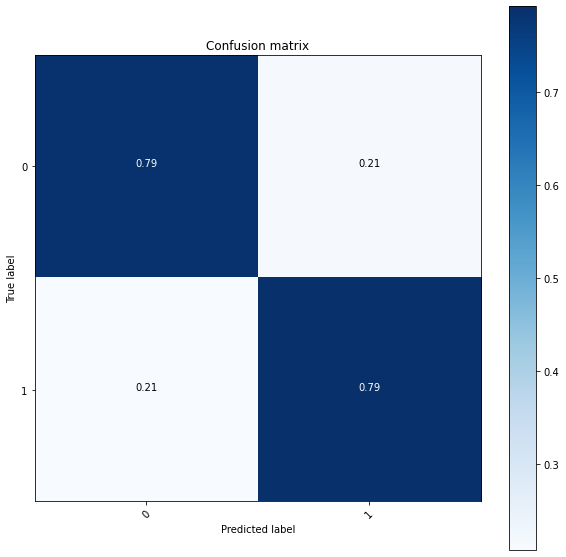

In [35]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='linear')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.8386683738796414
Fold: 2 of 5 => accuracy_score = 0.8245838668373879
Fold: 3 of 5 => accuracy_score = 0.8130601792573624
Fold: 4 of 5 => accuracy_score = 0.8565941101152369
Fold: 5 of 5 => accuracy_score = 0.8348271446862996

::Accuracy_score statistics::
Mean = 0.83355
STD = 0.01455


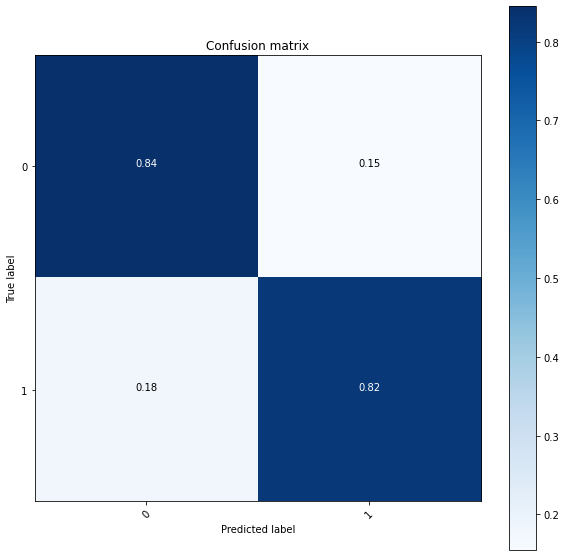

In [36]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='poly')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.5544174135723432
Fold: 2 of 5 => accuracy_score = 0.5467349551856594
Fold: 3 of 5 => accuracy_score = 0.5416133162612036
Fold: 4 of 5 => accuracy_score = 0.5620998719590269
Fold: 5 of 5 => accuracy_score = 0.5633802816901409

::Accuracy_score statistics::
Mean = 0.55365
STD = 0.00848


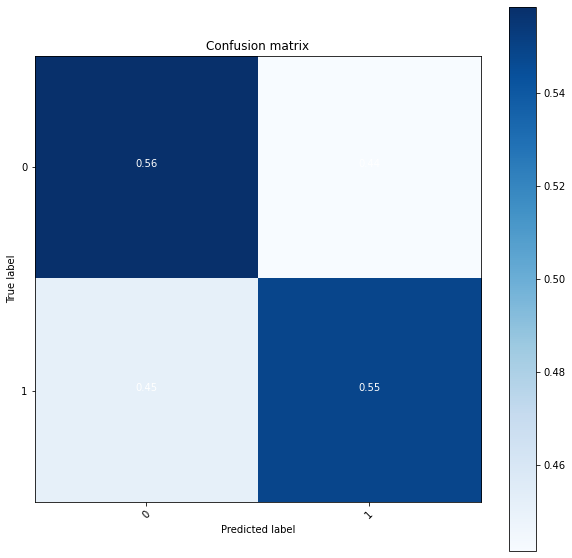

In [37]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='sigmoid')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

# Xgboost method
Refer: https://xgboost.readthedocs.io/en/latest/python/python_intro.html

/env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:33:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 1 of 5 => accuracy_score = 0.8668373879641486
[08:33:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 2 of 5 => accuracy_score = 0.8796414852752881
[08:33:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 3 of 5 => accuracy_score = 0.852752880921895
[08:33:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evalua

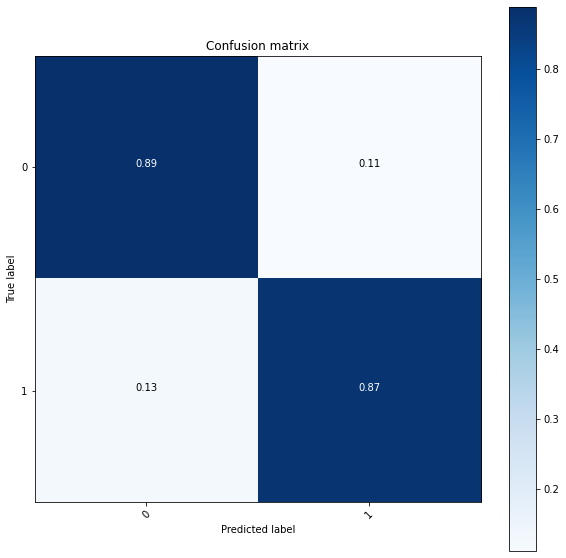

In [38]:
import xgboost as xgb

mod = xgb.XGBClassifier()
cm = kfold_validate(mod, X, y.astype(int))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

In [39]:
mod = xgb.XGBClassifier()
mod.fit(X, y)

[08:33:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
sorted(zip(mod.feature_importances_, df.columns[1:]), reverse=True)

[(0.0592361, 'rain_S2'),
 (0.054016545, 'LAI_S1'),
 (0.053039394, 'rain_S1'),
 (0.05224368, 'red_edge_1_S1'),
 (0.04900122, 'red_S2'),
 (0.036939878, 'swir_2_S1'),
 (0.03643839, 'red_edge_3_S1'),
 (0.034304976, 'sdev_S2'),
 (0.03278396, 'red_edge_3_S2'),
 (0.03236036, 'NDVI_S2'),
 (0.031694017, 'swir_2_S2'),
 (0.03157696, 'slope'),
 (0.031313837, 'red_edge_1_S2'),
 (0.031302013, 'LAI_S2'),
 (0.031210503, 'blue_S1'),
 (0.030112758, 'red_S1'),
 (0.028300738, 'blue_S2'),
 (0.027632477, 'red_edge_2_S1'),
 (0.027248403, 'edev_S1'),
 (0.02695027, 'sdev_S1'),
 (0.026902596, 'nir_S1'),
 (0.023144538, 'green_S2'),
 (0.02277149, 'MNDWI_S1'),
 (0.021335915, 'bcdev_S1'),
 (0.020992989, 'red_edge_2_S2'),
 (0.020316243, 'swir_1_S2'),
 (0.020268973, 'MNDWI_S2'),
 (0.019677183, 'bcdev_S2'),
 (0.019609602, 'nir_S2'),
 (0.01863232, 'NDVI_S1'),
 (0.018148223, 'swir_1_S1'),
 (0.017191058, 'green_S1'),
 (0.013302336, 'edev_S2')]

In [41]:
mod.feature_importances_.argmax(), df.columns[1:][5]

(31, 'swir_2_S1')

In [42]:
feature_name_mapping = dict((k, v) for k, v in zip(mod.get_booster().feature_names, df.columns[1:]))

In [43]:
feature_name_mapping

{'f0': 'red_S1',
 'f1': 'blue_S1',
 'f2': 'green_S1',
 'f3': 'nir_S1',
 'f4': 'swir_1_S1',
 'f5': 'swir_2_S1',
 'f6': 'red_edge_1_S1',
 'f7': 'red_edge_2_S1',
 'f8': 'red_edge_3_S1',
 'f9': 'edev_S1',
 'f10': 'sdev_S1',
 'f11': 'bcdev_S1',
 'f12': 'NDVI_S1',
 'f13': 'LAI_S1',
 'f14': 'MNDWI_S1',
 'f15': 'rain_S1',
 'f16': 'red_S2',
 'f17': 'blue_S2',
 'f18': 'green_S2',
 'f19': 'nir_S2',
 'f20': 'swir_1_S2',
 'f21': 'swir_2_S2',
 'f22': 'red_edge_1_S2',
 'f23': 'red_edge_2_S2',
 'f24': 'red_edge_3_S2',
 'f25': 'edev_S2',
 'f26': 'sdev_S2',
 'f27': 'bcdev_S2',
 'f28': 'NDVI_S2',
 'f29': 'LAI_S2',
 'f30': 'MNDWI_S2',
 'f31': 'rain_S2',
 'f32': 'slope'}

# importance_type (str, default "weight") –

How the importance is calculated: either “weight”, “gain”, or “cover”

”weight” is the number of times a feature appears in a tree

”gain” is the average gain of splits which use the feature

”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

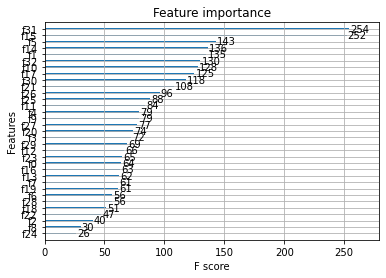

In [44]:
xgb.plot_importance(mod)

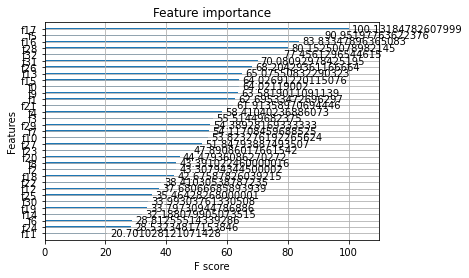

In [45]:
xgb.plot_importance(mod, importance_type='cover')

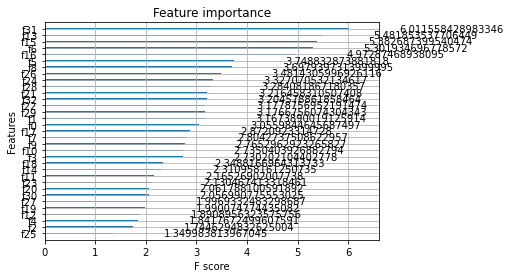

In [46]:
xgb.plot_importance(mod, importance_type='gain')

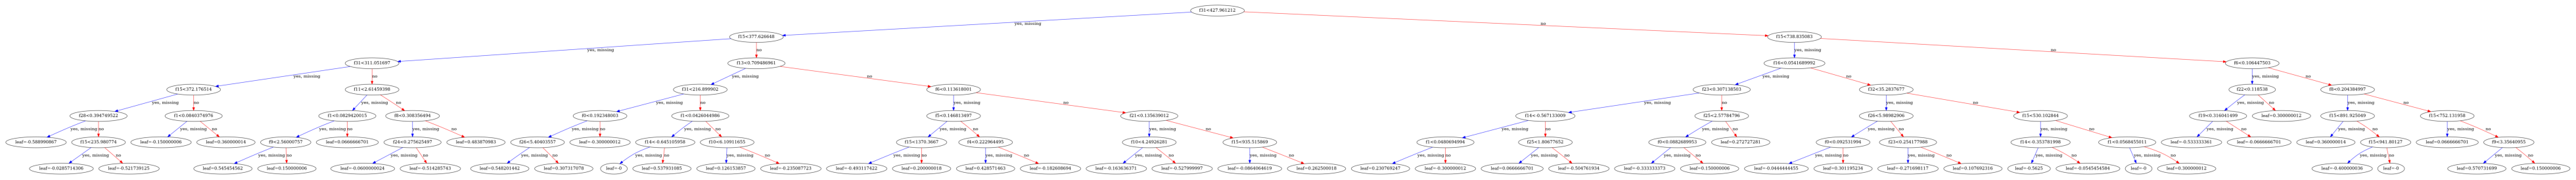

In [47]:
plt.figure(figsize=(70, 7))
xgb.plot_tree(mod, ax=plt.gca())
plt.savefig('tree.png')

In [48]:
mod.n_estimators

100

# TODO: xgboost hyperparameter search
- refer: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
- https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde
- bayesian hyperparameter tuning: https://github.com/fmfn/BayesianOptimization


In [51]:
!pip install -U shap

Processing /home/jovyan/.cache/pip/wheels/9f/f0/81/55d1fce3ccceacb520abc45e88f3d2de2959cd079f712b5f85/shap-0.37.0-cp36-cp36m-linux_x86_64.whl
  Using cached slicer-0.0.3-py3-none-any.whl (11 kB)
You should consider upgrading via the '/env/bin/python3 -m pip install --upgrade pip' command.


In [52]:
import shap

In [53]:
shap.initjs()

In [54]:
explainer = shap.TreeExplainer(mod)

shap_values = explainer.shap_values(X)

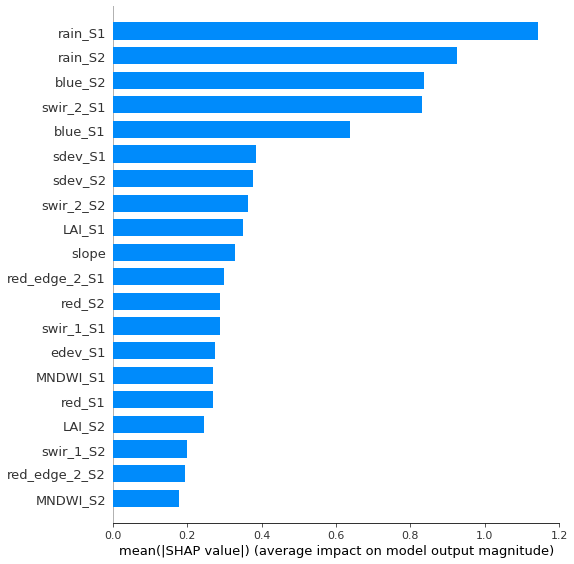

In [55]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=df.columns[1:])

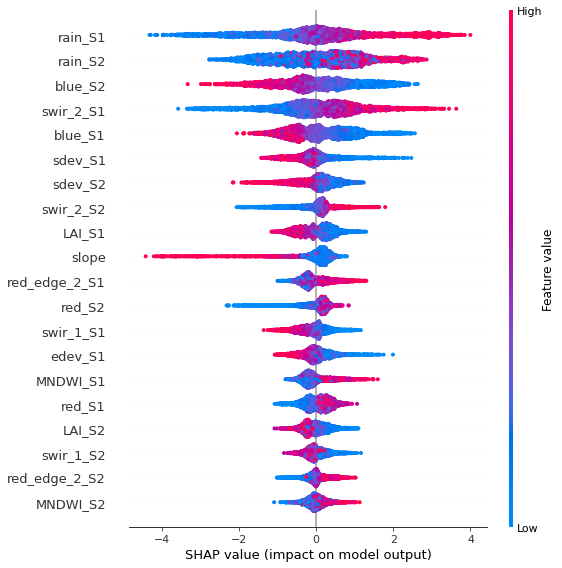

In [58]:
shap.summary_plot(shap_values, X, feature_names=df.columns[1:])

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Last modified:** Dec 2020
